In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
import itertools
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import scipy
register_matplotlib_converters()

In [33]:
# set datetime index
df = pd.read_csv("Sprint_Resampled Data.csv")
df['Date'] = df['Date'].apply(pd.to_datetime)
df = df.set_index('Date')

In [34]:
df = df['1991-3': '2019-5'].dropna(axis=1)
y = df["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]

In [35]:
data = {"col":[],"r2":[]}
r2df = pd.DataFrame(data)
for col in df.columns:
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[col], y)
#     print(col)
#     print(r_value)
    r2df.append(pd.Series([col,r_value]),ignore_index=True)

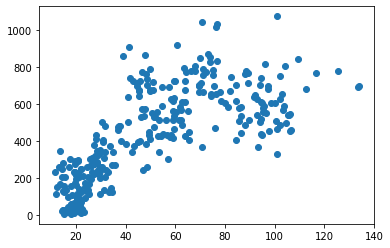

In [36]:
plt.scatter(df["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"],df["Weekly U.S. Imports of Gasoline Blending Components  (Thousand Barrels per Day)"])

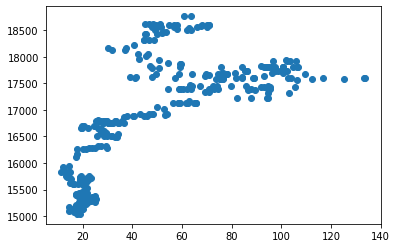

In [37]:
plt.scatter(df["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"],df["Weekly U. S. Operable Crude Oil Distillation Capacity   (Thousand Barrels per Calendar Day)"],cmap='jet')

In [38]:
# just gonna use "Weekly U.S. Imports of Gasoline Blending Components  (Thousand Barrels per Day)"
newdf = df[["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)" ,"Weekly U. S. Operable Crude Oil Distillation Capacity   (Thousand Barrels per Calendar Day)"]]
newdf

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Weekly U. S. Operable Crude Oil Distillation Capacity (Thousand Barrels per Calendar Day)
Date,,
1991-03-31,19.901500,15656.00
1991-04-30,20.830000,15657.50
1991-05-31,21.232273,15666.00
1991-06-30,20.189000,15676.25
1991-07-31,21.403043,15692.50
1991-08-31,21.693636,15710.20
1991-09-30,21.886500,15720.50
1991-10-31,23.230870,15727.00
1991-11-30,22.460952,15751.00


0.5773364079119867


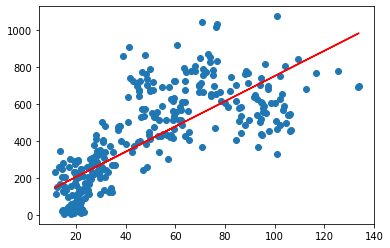

In [58]:
model = LinearRegression()
x = df["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"].values.reshape(-1,1)
y = df["Weekly U.S. Imports of Gasoline Blending Components  (Thousand Barrels per Day)"].values.reshape(-1,1)

model.fit(x,y)
r_sq = model.score(x,y)
print(r_sq)
Y_pred = model.predict(x)  # make predictions
plt.scatter(x, y)
plt.plot(x, Y_pred, color='red')
plt.show()